# P3 Part B
Gary Watson

Alex Hromada

Ethan Matzdorf

CS4821


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import plotly.graph_objects as go
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, KFold
from six import StringIO
from IPython.display import Image  
import pydotplus
%matplotlib inline

# Q4

In [ ]:
ypredData = [[1, 0.98], [0, 0.92], [1, 0.85], [0, 0.77], [0, 0.71], [1, 0.64], [1, 0.50], 
            [1, 0.39], [0, 0.34], [0, 0.31]]
ypredResults = [[0.98, 0.1, 0, 0.6], [0.92, 0.1, 0.1, 0.5], [0.85, 0.2, 0.1, 0.6], [0.77, 0.2, 0.2, 0.5], 
            [0.71, 0.2, 0.3, 0.4], [0.64, 0.3, 0.3, 0.5], [0.50, 0.4, 0.3, 0.6], [0.39, 0.5, 0.3, 0.7], 
            [0.34, 0.5, 0.4, 0.6], [0.31, 0.5, 0.5, 0.5]]
ypredResultsDF = pd.DataFrame(ypredResults, columns = ['Threshold', 'TPR', 'FPR', 'Accuracy'])
ypredResultsDF

,Threshold,TPR,FPR,Accuracy
0,0.98,0.1,0.0,0.6
1,0.92,0.1,0.1,0.5
2,0.85,0.2,0.1,0.6
3,0.77,0.2,0.2,0.5
4,0.71,0.2,0.3,0.4
5,0.64,0.3,0.3,0.5
6,0.50,0.4,0.3,0.6
7,0.39,0.5,0.3,0.7
8,0.34,0.5,0.4,0.6
9,0.31,0.5,0.5,0.5


# Q5

Text(0.5, 1.0, 'ROC Curve')

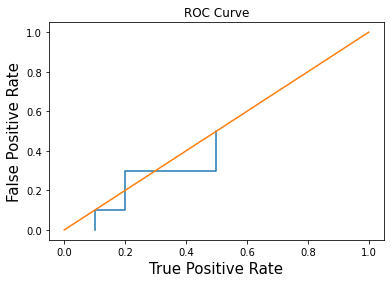

In [ ]:
tpr = [0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5]
fpr = [0.0, 0.1, 0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5]

plt.plot(tpr, fpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('True Positive Rate',size=15)
plt.ylabel('False Positive Rate',size=15)
plt.title('ROC Curve')

# Q6

# Q6(a)

In [ ]:
spam = pd.read_csv('spam.csv')
spam = spam[['day of week', 'time of day', 'size.kb', 'box',
       'local', 'digits', 'name', 'special', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text','spam']]

# Q6(b)

In [ ]:
#i)
spam_yes = spam[spam['spam'] == 'yes']
print(f"spam percent = {((len(spam_yes) / len(spam)) * 100):10.2f}")
#ii)
#spam percent is less than 50 percent so a constant classifier would always predict not spam
#iii)
#error rate of a constant classifier is just the proportion of non-majority samples
#because a constant classifier predicts the majority label all the time which is wrong
#when the label is not of the majority class i.e when spam = yes or 32.70 percent of the time

spam percent =      32.70


# Q6(c)

In [ ]:
# Encode object types to numeric
enc = OrdinalEncoder()
enc.fit(spam[["day of week", "box", "local", "name", "credit",
              "sucker", "porn", "chain", "username", "large text", "spam"]])

spam[["day of week", "box", "local", "name", "credit",
      "sucker", "porn", "chain", "username", 
      "large text", "spam"]] = enc.transform(spam[["day of week", "box", 
                                                   "local", "name", "credit",
                                                   "sucker", "porn", "chain", 
                                                   "username", "large text", "spam"]])

X_spam = spam[['day of week', 'time of day', 'size.kb', 'box',
       'local', 'digits', 'name', 'special', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text']]

Y_spam = spam[['spam']]


# Split data into 80/20 training/test data
X_spam_train, X_spam_test, Y_spam_train, Y_spam_test = train_test_split(
      X_spam, Y_spam, test_size=0.2, random_state=124)

Y_spam_test     


,spam
1860,0.0
881,0.0
1245,0.0
675,1.0
1824,1.0
...,...
978,0.0
190,0.0
1750,1.0
92,0.0


# Q6(d)

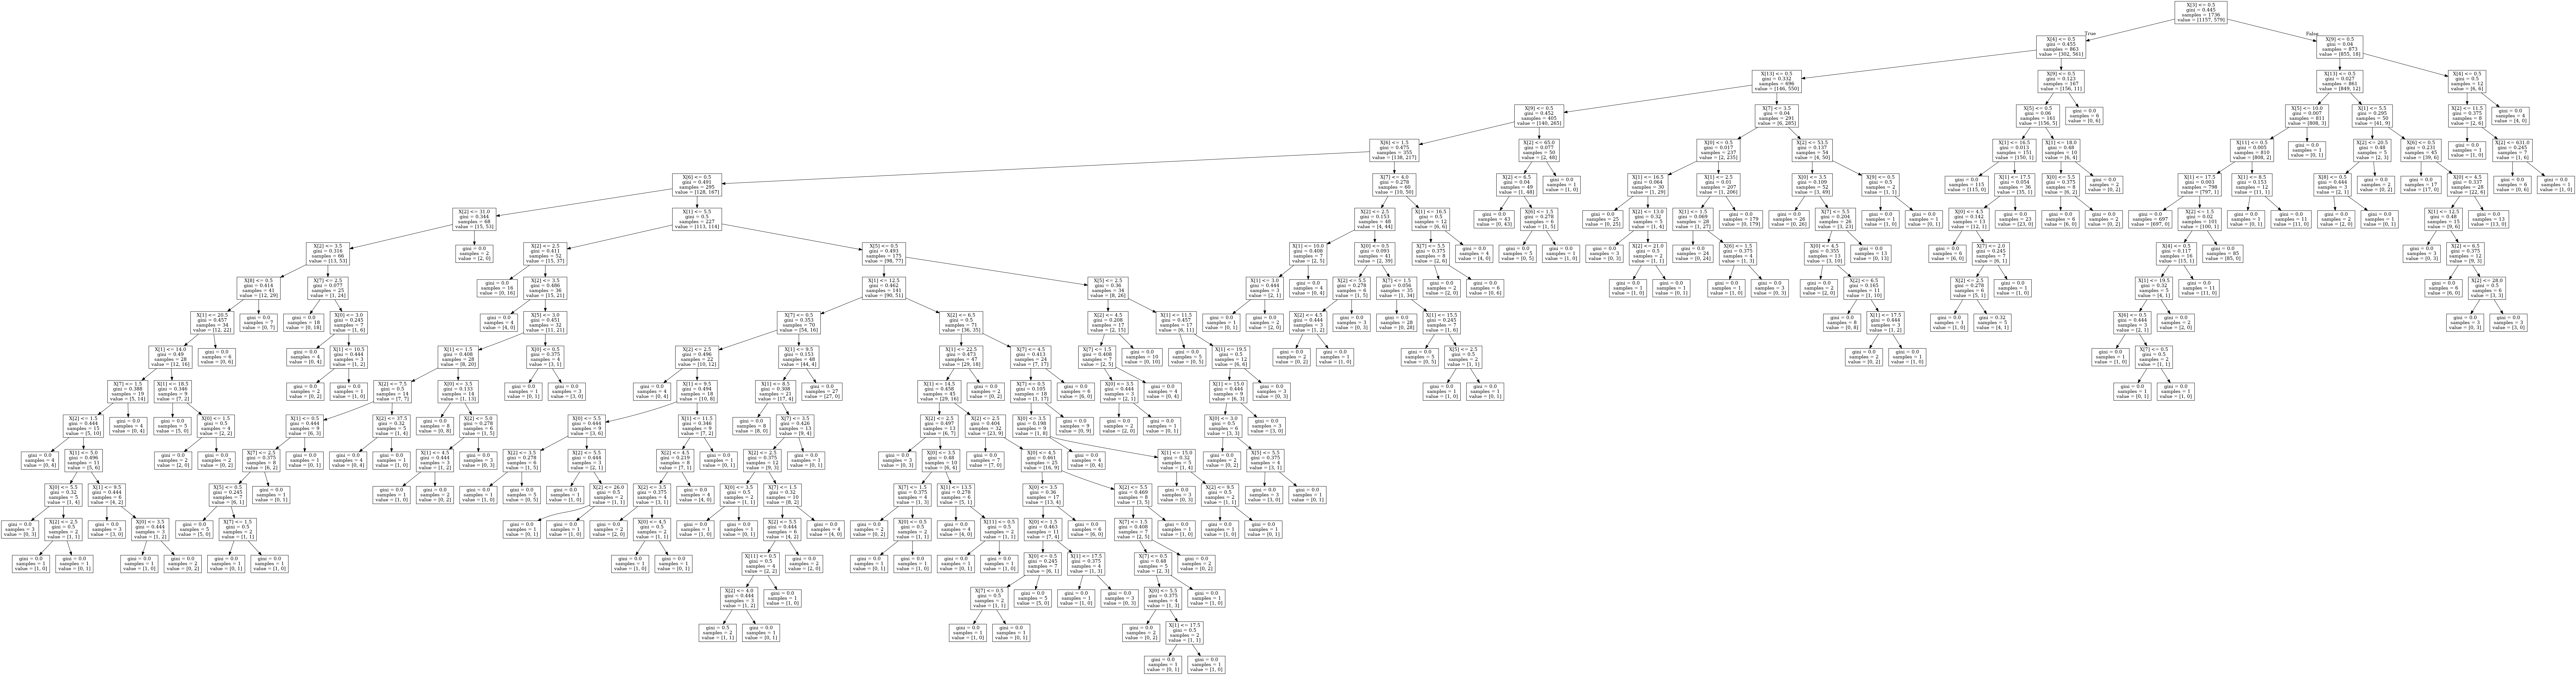

In [ ]:
#process data to make classification easier to read
clf = DecisionTreeClassifier()

#fit classifier
clf = clf.fit(X_spam_train,Y_spam_train)

#export learned tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# Q6(e)

#### Default split criteria is Gini. Entropy based can be selected

# Q6(f)

In [ ]:
y_predict = clf.predict(X_spam_test)
y_true = np.array(Y_spam_test.spam)

tp = metrics.confusion_matrix(y_true,y_predict)[0][0]
fp = metrics.confusion_matrix(y_true,y_predict)[0][1]
fn = metrics.confusion_matrix(y_true,y_predict)[1][0]
tn = metrics.confusion_matrix(y_true,y_predict)[1][1]

#accuracy
accuracy = metrics.accuracy_score(y_true,y_predict)
print(f"accuracy =\t {(accuracy):10.2f}")

#sensitivity
sensitivity = tp / (tp + fn)
print(f"sensitivity =\t {(sensitivity):10.2f}")

#specificity
specificity = tn / (tn + fp)
print(f"specificity =\t {(specificity):10.2f}")

#AUC
AUC = metrics.roc_auc_score(y_true,y_predict)
print(f"AUC =\t\t {(AUC):10.2f}")

accuracy =	       0.91
sensitivity =	       0.92
specificity =	       0.88
AUC =		       0.88


# Q6(g)

In [ ]:
'''
I played with this limiting it to different amount of nodes and 
interestingly we can limit the leaf node count to 5 when we originally had 
~50 and got basically the same level of perfomance which was really interesting
'''

#fit new model with best first leaf node creation that's limited to 20 nodes
clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_spam_train,Y_spam_train)

#test and measure performance
y_predict = clf.predict(X_spam_test)
y_true = np.array(Y_spam_test.spam)

tp = metrics.confusion_matrix(y_true,y_predict)[0][0]
fp = metrics.confusion_matrix(y_true,y_predict)[0][1]
fn = metrics.confusion_matrix(y_true,y_predict)[1][0]
tn = metrics.confusion_matrix(y_true,y_predict)[1][1]

#accuracy
accuracy = metrics.accuracy_score(y_true,y_predict)
print(f"accuracy =\t {(accuracy):10.2f}")

#sensitivity
sensitivity = tp / (tp + fn)
print(f"sensitivity =\t {(sensitivity):10.2f}")

#specificity
specificity = tn / (tn + fp)
print(f"specificity =\t {(specificity):10.2f}")

#AUC
AUC = metrics.roc_auc_score(y_true,y_predict)
print(f"AUC =\t\t {(AUC):10.2f}")


accuracy =	       0.89
sensitivity =	       0.97
specificity =	       0.76
AUC =		       0.90


# Q7

# Q7(a)

In [ ]:
nFolds = 10
kf = KFold(n_splits=nFolds, shuffle=True, random_state=3)

kcv_knn3_acc = []
kcv_knn7_acc = []
kcv_knn11_acc = []
kcv_knn15_acc = []
kcv_tree1_acc = []
kcv_tree2_acc = []
kcv_bayes_acc = []

kcv_knn3_sens = []
kcv_knn7_sens = []
kcv_knn11_sens = []
kcv_knn15_sens = []
kcv_tree1_sens = []
kcv_tree2_sens = []
kcv_bayes_sens = []

kcv_knn3_spec = []
kcv_knn7_spec = []
kcv_knn11_spec = []
kcv_knn15_spec = []
kcv_tree1_spec = []
kcv_tree2_spec = []
kcv_bayes_spec = []

kcv_knn3_auc = []
kcv_knn7_auc = []
kcv_knn11_auc = []
kcv_knn15_auc = []
kcv_tree1_auc = []
kcv_tree2_auc = []
kcv_bayes_auc = []


for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]

    # Scale the data 
    scaler = StandardScaler().fit(x_train)
    X_train_transformed = scaler.transform(x_train)
    X_test_transformed = scaler.transform(x_test)

    # K-Nearest-Neighbor
    # k = 3
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(X_train_transformed, y_train.values.ravel())
    y_pred_knn3 = knn3.predict(X_test_transformed)
    # Confusion Matrix
    tp_knn3 = confusion_matrix(y_test, y_pred_knn3)[0][0]
    fp_knn3 = confusion_matrix(y_test, y_pred_knn3)[0][1]
    fn_knn3 = confusion_matrix(y_test, y_pred_knn3)[1][0]
    tn_knn3 = confusion_matrix(y_test, y_pred_knn3)[1][1]
    # Append metrics to lists
    kcv_knn3_acc.append(metrics.accuracy_score(y_test, y_pred_knn3))
    kcv_knn3_sens.append(tp_knn3 / (tp_knn3 + fn_knn3))
    kcv_knn3_spec.append(tn_knn3 / (tn_knn3 + fp_knn3))
    kcv_knn3_auc.append(metrics.roc_auc_score(y_test, y_pred_knn3))


    # k = 7
    knn7 = KNeighborsClassifier(n_neighbors=7)
    knn7.fit(X_train_transformed, y_train.values.ravel())
    y_pred_knn7 = knn7.predict(X_test_transformed)
    # Confusion matrix
    tp_knn7 = confusion_matrix(y_test, y_pred_knn7)[0][0]
    fp_knn7 = confusion_matrix(y_test, y_pred_knn7)[0][1]
    fn_knn7 = confusion_matrix(y_test, y_pred_knn7)[1][0]
    tn_knn7 = confusion_matrix(y_test, y_pred_knn7)[1][1]
    # Append metrics to lists
    kcv_knn7_acc.append(metrics.accuracy_score(y_test, y_pred_knn7))
    kcv_knn7_sens.append(tp_knn7 / (tp_knn7 + fn_knn7))
    kcv_knn7_spec.append(tn_knn7 / (tn_knn7 + fp_knn7))
    kcv_knn7_auc.append(metrics.roc_auc_score(y_test, y_pred_knn7))


    # k = 11
    knn11 = KNeighborsClassifier(n_neighbors=11)
    knn11.fit(X_train_transformed, y_train.values.ravel())
    y_pred_knn11 = knn11.predict(X_test_transformed)
    # Confusion Matrix
    tp_knn11 = confusion_matrix(y_test, y_pred_knn11)[0][0]
    fp_knn11 = confusion_matrix(y_test, y_pred_knn11)[0][1]
    fn_knn11 = confusion_matrix(y_test, y_pred_knn11)[1][0]
    tn_knn11 = confusion_matrix(y_test, y_pred_knn11)[1][1]
    # Append metrics to lists
    kcv_knn11_acc.append(metrics.accuracy_score(y_test, y_pred_knn11))
    kcv_knn11_sens.append(tp_knn11 / (tp_knn11 + fn_knn11))
    kcv_knn11_spec.append(tn_knn11 / (tn_knn11 + fp_knn11))
    kcv_knn11_auc.append(metrics.roc_auc_score(y_test, y_pred_knn11))


    # k = 15
    knn15 = KNeighborsClassifier(n_neighbors=15)
    knn15.fit(X_train_transformed, y_train.values.ravel())
    y_pred_knn15 = knn15.predict(X_test_transformed)
    # Confusion Matrix
    tp_knn15 = confusion_matrix(y_test, y_pred_knn15)[0][0]
    fp_knn15 = confusion_matrix(y_test, y_pred_knn15)[0][1]
    fn_knn15 = confusion_matrix(y_test, y_pred_knn15)[1][0]
    tn_knn15 = confusion_matrix(y_test, y_pred_knn15)[1][1]
    # Append metrics to lists
    kcv_knn15_acc.append(metrics.accuracy_score(y_test, y_pred_knn15))
    kcv_knn15_sens.append(tp_knn15 / (tp_knn15 + fn_knn15))
    kcv_knn15_spec.append(tn_knn15 / (tn_knn15 + fp_knn15))
    kcv_knn15_auc.append(metrics.roc_auc_score(y_test, y_pred_knn15))


    # Decision Tree
    # Tree with 5 leaf nodes
    clf1 = DecisionTreeClassifier(max_leaf_nodes=5)
    clf1.fit(x_train,y_train.values.ravel())
    y_pred_tree1 = clf1.predict(x_test)
    # Confusion Matrix
    tp_tree1 = confusion_matrix(y_test, y_pred_tree1)[0][0]
    fp_tree1 = confusion_matrix(y_test, y_pred_tree1)[0][1]
    fn_tree1 = confusion_matrix(y_test, y_pred_tree1)[1][0]
    tn_tree1 = confusion_matrix(y_test, y_pred_tree1)[1][1]
    # Append metrics to lists
    kcv_tree1_acc.append(metrics.accuracy_score(y_test, y_pred_tree1))
    kcv_tree1_sens.append(tp_tree1 / (tp_tree1 + fn_tree1))
    kcv_tree1_spec.append(tn_tree1 / (tn_tree1 + fp_tree1))
    kcv_tree1_auc.append(metrics.roc_auc_score(y_test, y_pred_tree1))
    
    # Tree with 8 leaf nodes
    clf2 = DecisionTreeClassifier(max_leaf_nodes=8)
    clf2.fit(x_train,y_train.values.ravel())
    y_pred_tree2 = clf2.predict(x_test)
    # Confusion Matrix
    tp_tree2 = confusion_matrix(y_test, y_pred_tree2)[0][0]
    fp_tree2 = confusion_matrix(y_test, y_pred_tree2)[0][1]
    fn_tree2 = confusion_matrix(y_test, y_pred_tree2)[1][0]
    tn_tree2 = confusion_matrix(y_test, y_pred_tree2)[1][1]
    # Append metrics to lists
    kcv_tree2_acc.append(metrics.accuracy_score(y_test, y_pred_tree2))
    kcv_tree2_sens.append(tp_tree2 / (tp_tree2 + fn_tree2))
    kcv_tree2_spec.append(tn_tree2 / (tn_tree2 + fp_tree2))
    kcv_tree2_auc.append(metrics.roc_auc_score(y_test, y_pred_tree2))


    # Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.values.ravel())
    y_pred_bayes = gnb.predict(x_test)
    # Confusion Matrix
    tp_bayes = confusion_matrix(y_test, y_pred_bayes)[0][0]
    fp_bayes = confusion_matrix(y_test, y_pred_bayes)[0][1]
    fn_bayes = confusion_matrix(y_test, y_pred_bayes)[1][0]
    tn_bayes = confusion_matrix(y_test, y_pred_bayes)[1][1]
    # Append metrics to lists
    kcv_bayes_acc.append(metrics.accuracy_score(y_test, y_pred_bayes))
    kcv_bayes_sens.append(tp_bayes / (tp_bayes + fn_bayes))
    kcv_bayes_spec.append(tn_bayes / (tn_bayes + fp_bayes))
    kcv_bayes_auc.append(metrics.roc_auc_score(y_test, y_pred_bayes))


    

# Append means of auc values to their respective arrays
kcv_knn3_acc.append(np.mean(kcv_knn3_acc))
kcv_knn7_acc.append(np.mean(kcv_knn7_acc))
kcv_knn11_acc.append(np.mean(kcv_knn11_acc))
kcv_knn15_acc.append(np.mean(kcv_knn15_acc))
kcv_tree1_acc.append(np.mean(kcv_tree1_acc))
kcv_tree2_acc.append(np.mean(kcv_tree2_acc))
kcv_bayes_acc.append(np.mean(kcv_bayes_acc))

# Append means of auc values to their respective arrays
kcv_knn3_sens.append(np.mean(kcv_knn3_sens))
kcv_knn7_sens.append(np.mean(kcv_knn7_sens))
kcv_knn11_sens.append(np.mean(kcv_knn11_sens))
kcv_knn15_sens.append(np.mean(kcv_knn15_sens))
kcv_tree1_sens.append(np.mean(kcv_tree1_sens))
kcv_tree2_sens.append(np.mean(kcv_tree2_sens))
kcv_bayes_sens.append(np.mean(kcv_bayes_sens))

# Append means of auc values to their respective arrays
kcv_knn3_spec.append(np.mean(kcv_knn3_spec))
kcv_knn7_spec.append(np.mean(kcv_knn7_spec))
kcv_knn11_spec.append(np.mean(kcv_knn11_spec))
kcv_knn15_spec.append(np.mean(kcv_knn15_spec))
kcv_tree1_spec.append(np.mean(kcv_tree1_spec))
kcv_tree2_spec.append(np.mean(kcv_tree2_spec))
kcv_bayes_spec.append(np.mean(kcv_bayes_spec))

# Append means of auc values to their respective arrays
kcv_knn3_auc.append(np.mean(kcv_knn3_auc))
kcv_knn7_auc.append(np.mean(kcv_knn7_auc))
kcv_knn11_auc.append(np.mean(kcv_knn11_auc))
kcv_knn15_auc.append(np.mean(kcv_knn15_auc))
kcv_tree1_auc.append(np.mean(kcv_tree1_auc))
kcv_tree2_auc.append(np.mean(kcv_tree2_auc))
kcv_bayes_auc.append(np.mean(kcv_bayes_auc))

# Q7(b)

In [ ]:
# Accuracy

d_acc = {'KNN3': kcv_knn3_acc, 'KNN7': kcv_knn7_acc, 'KNN11': kcv_knn11_acc, 'KNN15': kcv_knn15_acc, 
            'TREE1': kcv_tree1_acc, 'TREE2': kcv_tree2_acc, 'NB': kcv_bayes_acc}

df_acc = pd.DataFrame(d_acc)

df_acc


,KNN3,KNN7,KNN11,KNN15,TREE1,TREE2,NB
0,0.899083,0.889908,0.876147,0.889908,0.894495,0.894495,0.880734
1,0.917051,0.921659,0.921659,0.917051,0.926267,0.926267,0.912442
2,0.921659,0.912442,0.898618,0.898618,0.870968,0.875576,0.903226
3,0.889401,0.894009,0.894009,0.898618,0.875576,0.838710,0.880184
4,0.930876,0.903226,0.898618,0.884793,0.870968,0.870968,0.898618
5,0.903226,0.917051,0.903226,0.898618,0.894009,0.894009,0.880184
6,0.912442,0.926267,0.926267,0.921659,0.884793,0.884793,0.907834
7,0.935484,0.935484,0.935484,0.935484,0.912442,0.921659,0.903226
8,0.898618,0.880184,0.889401,0.889401,0.894009,0.894009,0.884793
9,0.926267,0.898618,0.903226,0.903226,0.949309,0.949309,0.870968


In [ ]:
# Sensitivity

d_sens = {'KNN3': kcv_knn3_sens, 'KNN7': kcv_knn7_sens, 'KNN11': kcv_knn11_sens, 'KNN15': kcv_knn15_sens, 
            'TREE1': kcv_tree1_sens, 'TREE2': kcv_tree2_sens, 'NB': kcv_bayes_sens}

df_sens = pd.DataFrame(d_sens)

df_sens

,KNN3,KNN7,KNN11,KNN15,TREE1,TREE2,NB
0,0.941606,0.934307,0.920290,0.921986,0.991803,0.991803,0.892617
1,0.909091,0.926174,0.931973,0.925676,0.984848,0.984848,0.903226
2,0.949640,0.962406,0.934783,0.941176,0.952381,0.960000,0.890323
3,0.900709,0.913043,0.925373,0.932331,0.936508,0.822785,0.867550
4,0.967949,0.960526,0.954248,0.947368,0.978417,0.978417,0.911243
5,0.930556,0.931973,0.918919,0.912752,0.976562,0.976562,0.856287
6,0.944056,0.957746,0.951389,0.944828,0.961832,0.961832,0.914474
7,0.955414,0.961290,0.955414,0.955414,0.979167,0.992958,0.895349
8,0.929577,0.915493,0.910959,0.916667,0.968992,0.968992,0.883871
9,0.920000,0.905405,0.906040,0.900662,0.978102,0.978102,0.860759


In [ ]:
# Specificity

d_spec = {'KNN3': kcv_knn3_spec, 'KNN7': kcv_knn7_spec, 'KNN11': kcv_knn11_spec, 'KNN15': kcv_knn15_spec, 
            'TREE1': kcv_tree1_spec, 'TREE2': kcv_tree2_spec, 'NB': kcv_bayes_spec}
            
df_spec = pd.DataFrame(d_spec)

df_spec

,KNN3,KNN7,KNN11,KNN15,TREE1,TREE2,NB
0,0.827160,0.814815,0.800000,0.831169,0.770833,0.770833,0.855072
1,0.936508,0.911765,0.900000,0.898551,0.835294,0.835294,0.935484
2,0.871795,0.833333,0.835443,0.827160,0.758242,0.760870,0.935484
3,0.868421,0.860759,0.843373,0.845238,0.791209,0.881356,0.909091
4,0.836066,0.769231,0.765625,0.738462,0.679487,0.679487,0.854167
5,0.849315,0.885714,0.869565,0.867647,0.775281,0.775281,0.960000
6,0.851351,0.866667,0.876712,0.875000,0.767442,0.767442,0.892308
7,0.883333,0.870968,0.883333,0.883333,0.780822,0.786667,0.933333
8,0.840000,0.813333,0.845070,0.835616,0.784091,0.784091,0.887097
9,0.940299,0.884058,0.897059,0.909091,0.900000,0.900000,0.898305


In [ ]:
# AUC

d_auc = {'KNN3': kcv_knn3_auc, 'KNN7': kcv_knn7_auc, 'KNN11': kcv_knn11_auc, 'KNN15': kcv_knn15_auc, 
            'TREE1': kcv_tree1_auc, 'TREE2': kcv_tree2_auc, 'NB': kcv_bayes_auc}

df_auc = pd.DataFrame(d_auc)

df_auc

,KNN3,KNN7,KNN11,KNN15,TREE1,TREE2,NB
0,0.897716,0.887552,0.870723,0.881212,0.916410,0.916410,0.858368
1,0.890221,0.903824,0.907201,0.900352,0.937690,0.937690,0.883371
2,0.918122,0.917371,0.894225,0.897371,0.882535,0.889202,0.872582
3,0.876004,0.884854,0.890055,0.896305,0.880657,0.799453,0.853102
4,0.924301,0.899845,0.890916,0.875776,0.895575,0.895575,0.844332
5,0.892625,0.902969,0.885632,0.878688,0.910201,0.910201,0.826437
6,0.905991,0.923500,0.919882,0.912840,0.896296,0.896296,0.884478
7,0.919374,0.924522,0.919374,0.919374,0.924045,0.940711,0.840446
8,0.889840,0.869197,0.872764,0.876142,0.906631,0.906631,0.852407
9,0.905915,0.878498,0.882019,0.878873,0.951831,0.951831,0.832207
